In [6]:
from google.colab import files
uploaded = files.upload()

Saving road_accident_dataset.csv to road_accident_dataset (1).csv


In [70]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

sns.set_style("whitegrid")

In [71]:
# Read dataset into DataFrame
df = pd.read_csv('road_accident_dataset.csv')
print(df.shape)
print(df.info())
print(df.head())
print(df.isnull().sum())

# Identify numeric and categorical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill missing values: numeric with median, categorical with mode
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

(132000, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132000 entries, 0 to 131999
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      132000 non-null  object 
 1   Year                         132000 non-null  int64  
 2   Month                        132000 non-null  object 
 3   Day of Week                  132000 non-null  object 
 4   Time of Day                  132000 non-null  object 
 5   Urban/Rural                  132000 non-null  object 
 6   Road Type                    132000 non-null  object 
 7   Weather Conditions           132000 non-null  object 
 8   Visibility Level             132000 non-null  float64
 9   Number of Vehicles Involved  132000 non-null  int64  
 10  Speed Limit                  132000 non-null  int64  
 11  Driver Age Group             132000 non-null  object 
 12  Driver Gender                132000 non-null 

In [72]:
# Create proper datetime object from Year and Month columns
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'] + '-01', errors='coerce')


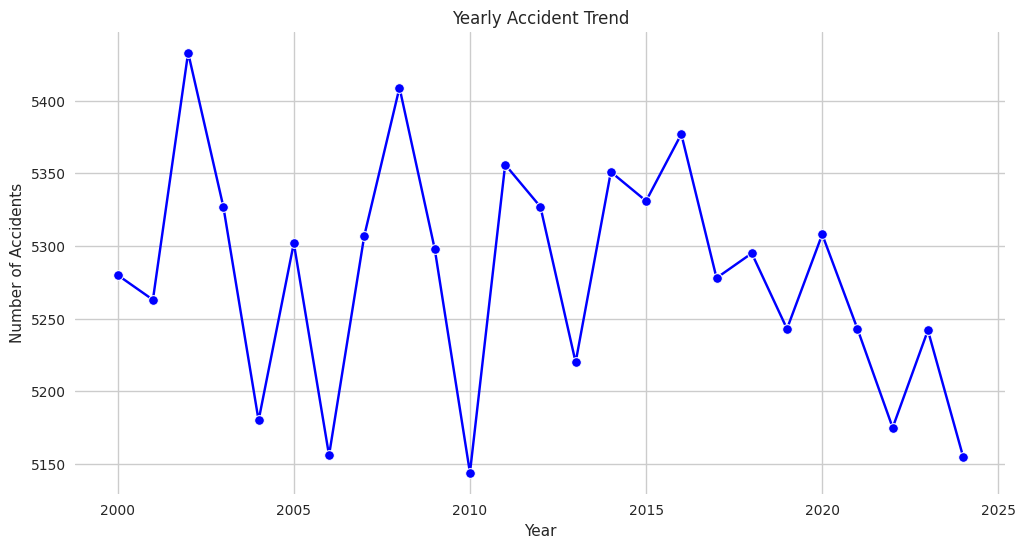

In [73]:
# Yearly Accident Trends
yearly_trend = df.groupby('Year').size()

plt.figure(figsize=(12,6))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker='o', color='blue')
plt.title("Yearly Accident Trend")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.show()

/tmp/ipython-input-74-1702302709.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_trend.index, y=monthly_trend.values, palette='mako')


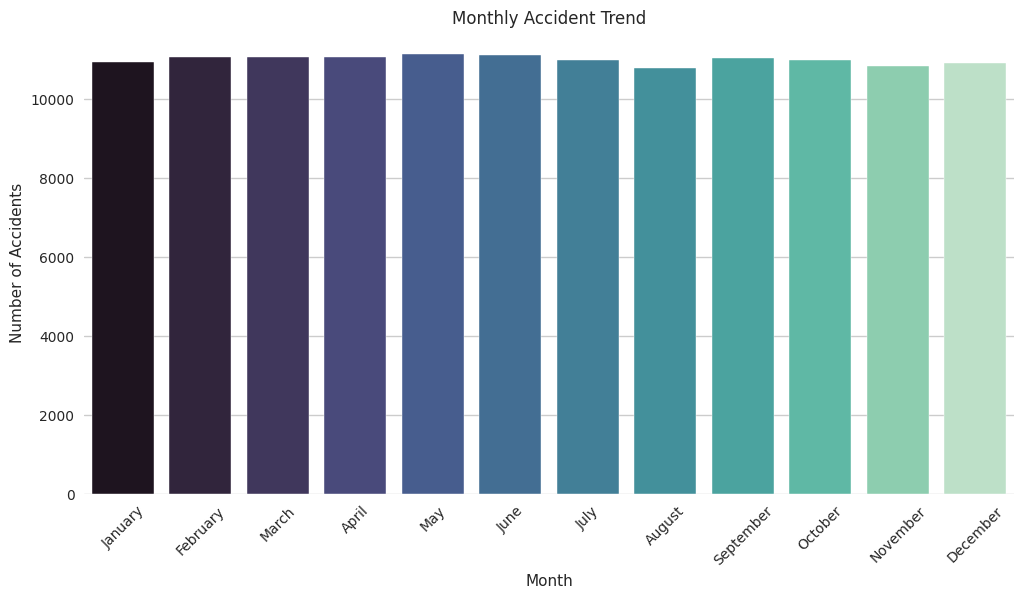

In [74]:
# Monthly Accident Trends
monthly_trend = df.groupby('Month').size().reindex(list(calendar.month_name)[1:])

plt.figure(figsize=(12,6))
sns.barplot(x=monthly_trend.index, y=monthly_trend.values, palette='mako')
plt.title("Monthly Accident Trend")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-75-3389004568.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cause_count.index, y=cause_count.values, palette='rocket')


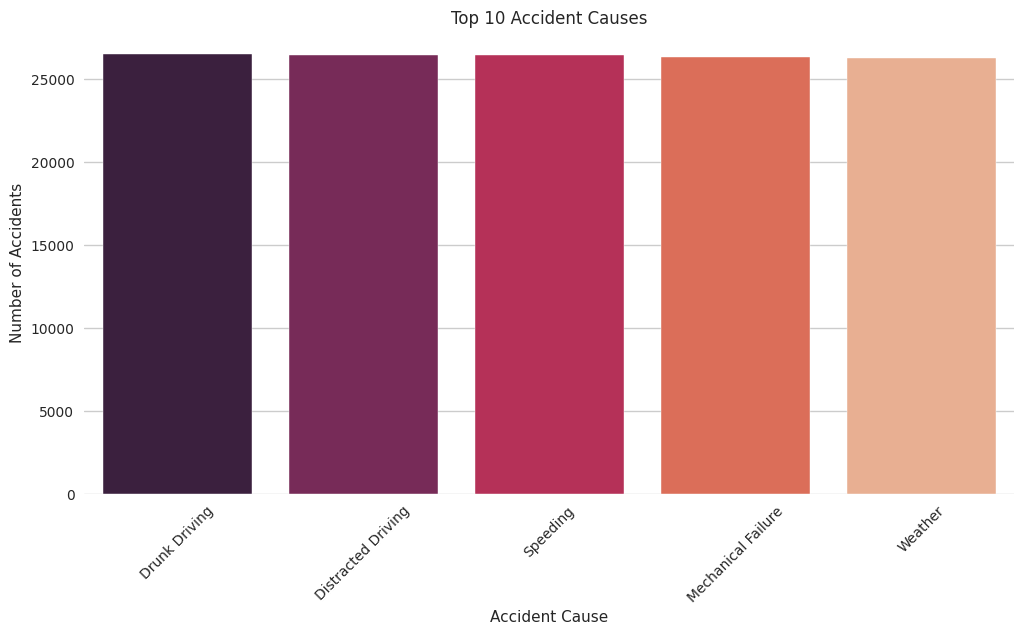

In [75]:
# Top 10 Accident Causes
cause_count = df['Accident Cause'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=cause_count.index, y=cause_count.values, palette='rocket')
plt.title("Top 10 Accident Causes")
plt.xlabel("Accident Cause")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-76-1507327960.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Accident Cause', y='Number of Fatalities', palette='coolwarm')


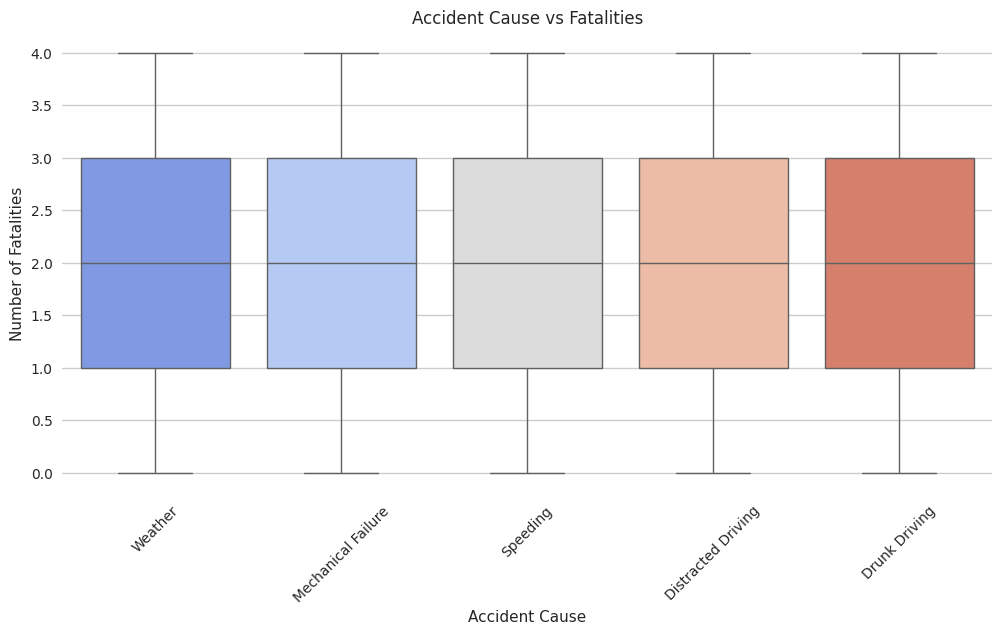

In [76]:
# Explore relationship between cause and fatalities
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Accident Cause', y='Number of Fatalities', palette='coolwarm')
plt.title("Accident Cause vs Fatalities")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-77-2583805826.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_accidents.index, y=region_accidents.values, palette='mako')


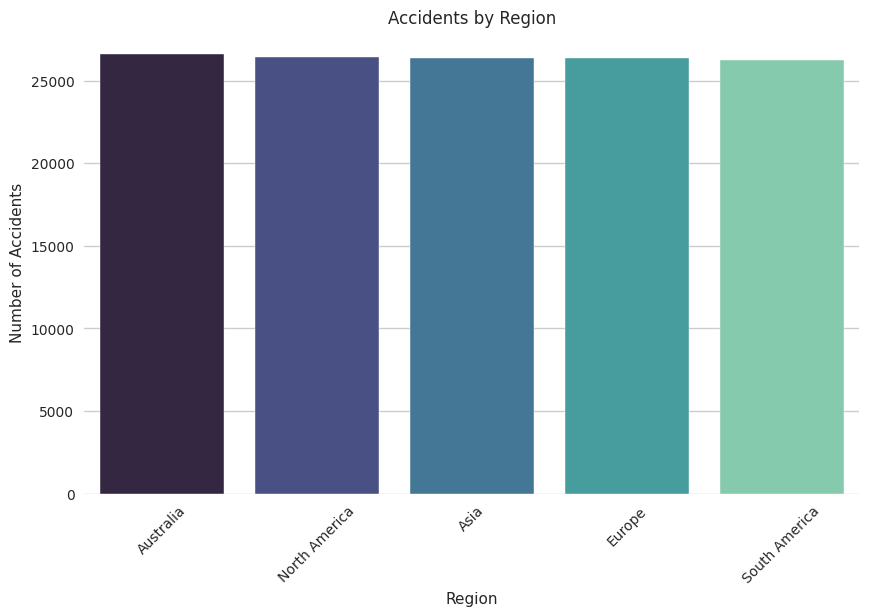

/tmp/ipython-input-77-2583805826.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Region', y='Number of Fatalities', palette='flare')


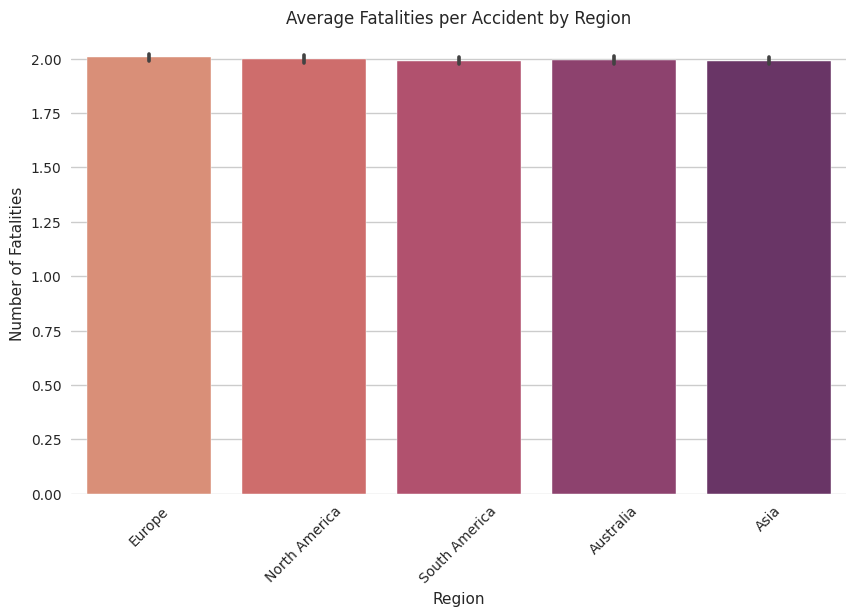

In [77]:
region_accidents = df['Region'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=region_accidents.index, y=region_accidents.values, palette='mako')
plt.title("Accidents by Region")
plt.xticks(rotation=45)
plt.ylabel("Number of Accidents")
plt.show()

# Average fatalities per region
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Region', y='Number of Fatalities', palette='flare')
plt.title("Average Fatalities per Accident by Region")
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-79-1608607759.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Urban/Rural', palette='Set2')


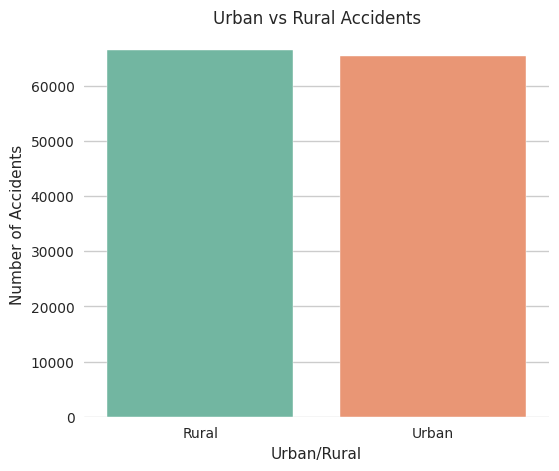

In [79]:
# Compare accident frequency in urban and rural areas
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='Urban/Rural', palette='Set2')
plt.title("Urban vs Rural Accidents")
plt.ylabel("Number of Accidents")
plt.show()

/tmp/ipython-input-80-3791350904.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Road Type', palette='cool')


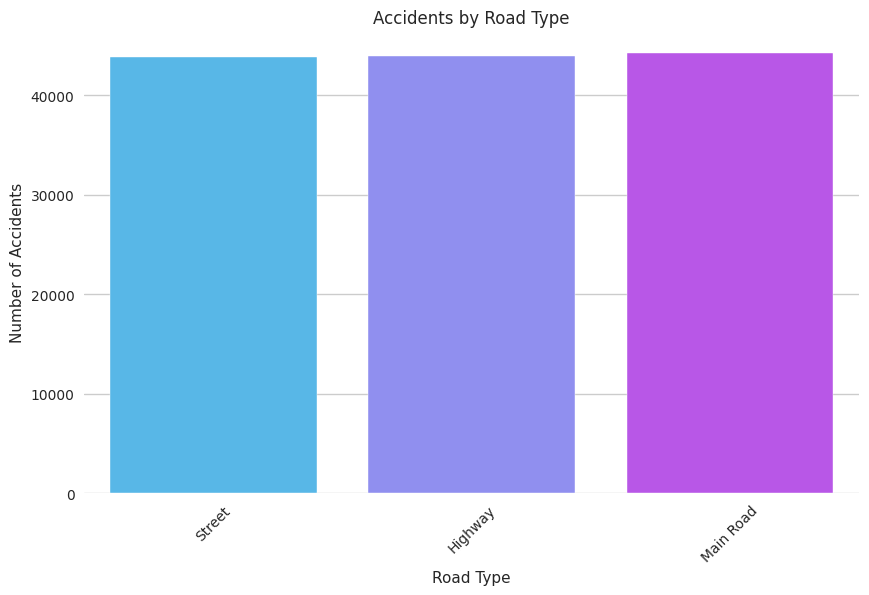

/tmp/ipython-input-80-3791350904.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Weather Conditions', palette='Spectral')


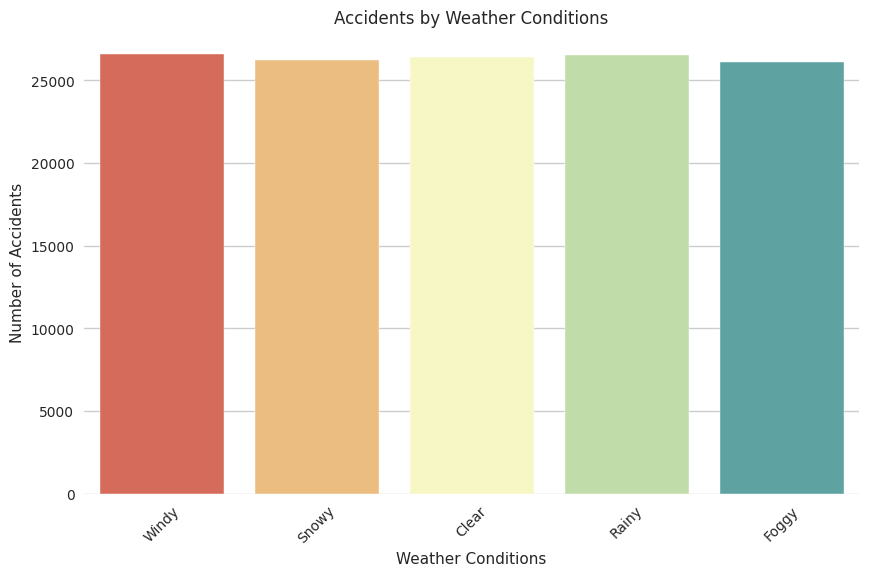

/tmp/ipython-input-80-3791350904.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Road Condition', palette='magma')


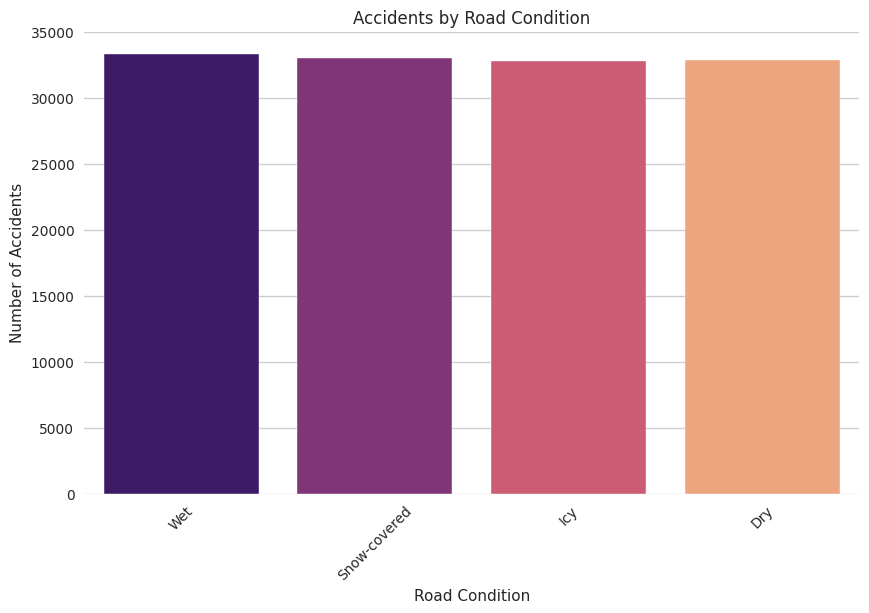

In [80]:
# Distribution of accidents across different road types
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Road Type', palette='cool')
plt.title("Accidents by Road Type")
plt.xticks(rotation=45)
plt.ylabel("Number of Accidents")
plt.show()

# Distribution of accidents by weather conditions
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Weather Conditions', palette='Spectral')
plt.title("Accidents by Weather Conditions")
plt.xticks(rotation=45)
plt.ylabel("Number of Accidents")
plt.show()

# Distribution of accidents by road condition
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Road Condition', palette='magma')
plt.title("Accidents by Road Condition")
plt.xticks(rotation=45)
plt.ylabel("Number of Accidents")
plt.show()

/tmp/ipython-input-81-496795251.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fatality_avg.index, y=fatality_avg.values, palette='Reds')


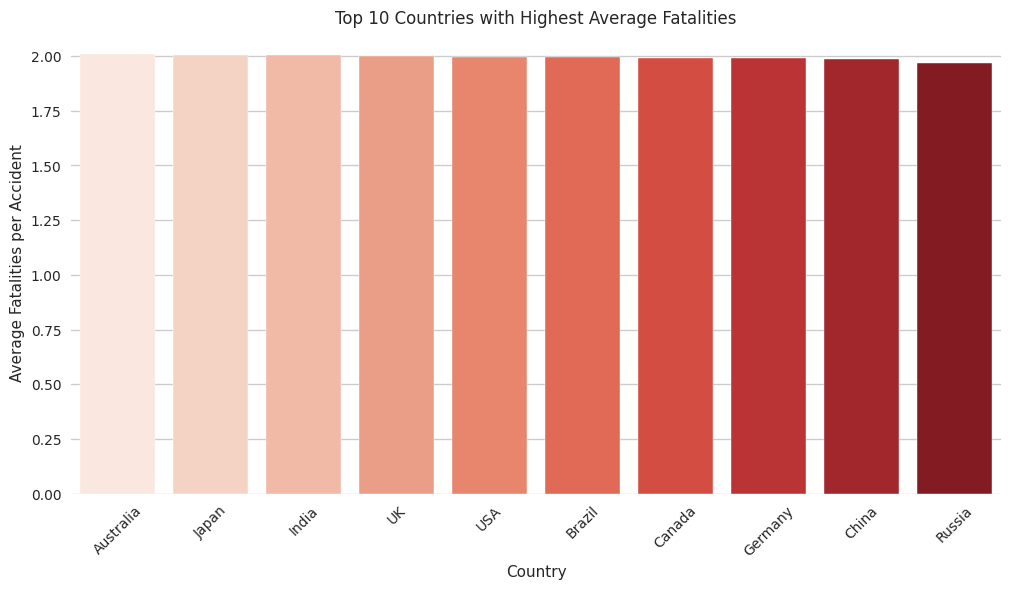

In [81]:
fatality_avg = df.groupby('Country')['Number of Fatalities'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=fatality_avg.index, y=fatality_avg.values, palette='Reds')
plt.title("Top 10 Countries with Highest Average Fatalities")
plt.ylabel("Average Fatalities per Accident")
plt.xticks(rotation=45)
plt.show()

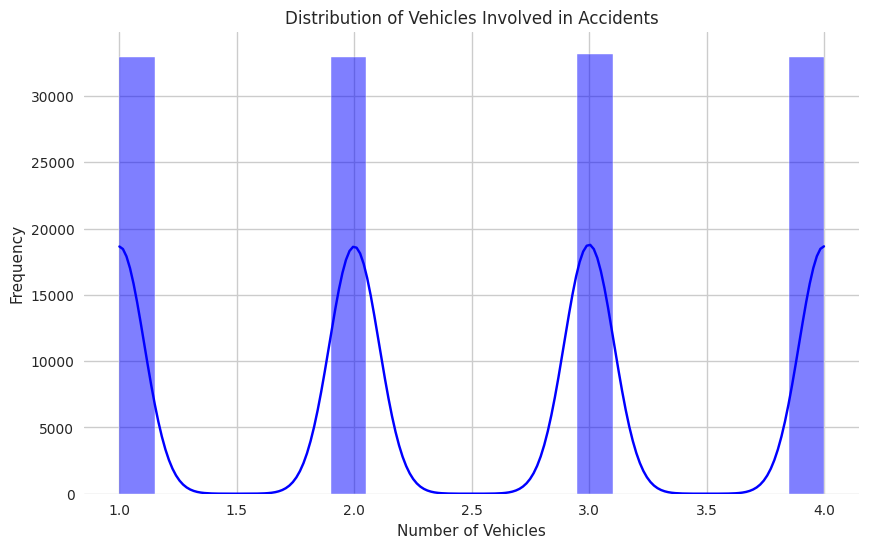

In [82]:
# Histogram showing how many vehicles involved in accidents
plt.figure(figsize=(10,6))
sns.histplot(df['Number of Vehicles Involved'], bins=20, kde=True, color='blue')
plt.title("Distribution of Vehicles Involved in Accidents")
plt.xlabel("Number of Vehicles")
plt.ylabel("Frequency")
plt.show()

In [84]:
# Extract weekday and weekend indicator
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Is_Weekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

# Assign season based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['Season'] = df['Date'].dt.month.apply(get_season)

# Classify accident severity based on fatalities
def severity(fatalities):
    if fatalities == 0:
        return 'Low'
    elif fatalities <= 2:
        return 'Medium'
    else:
        return 'High'

df['Accident_Severity'] = df['Number of Fatalities'].apply(severity)



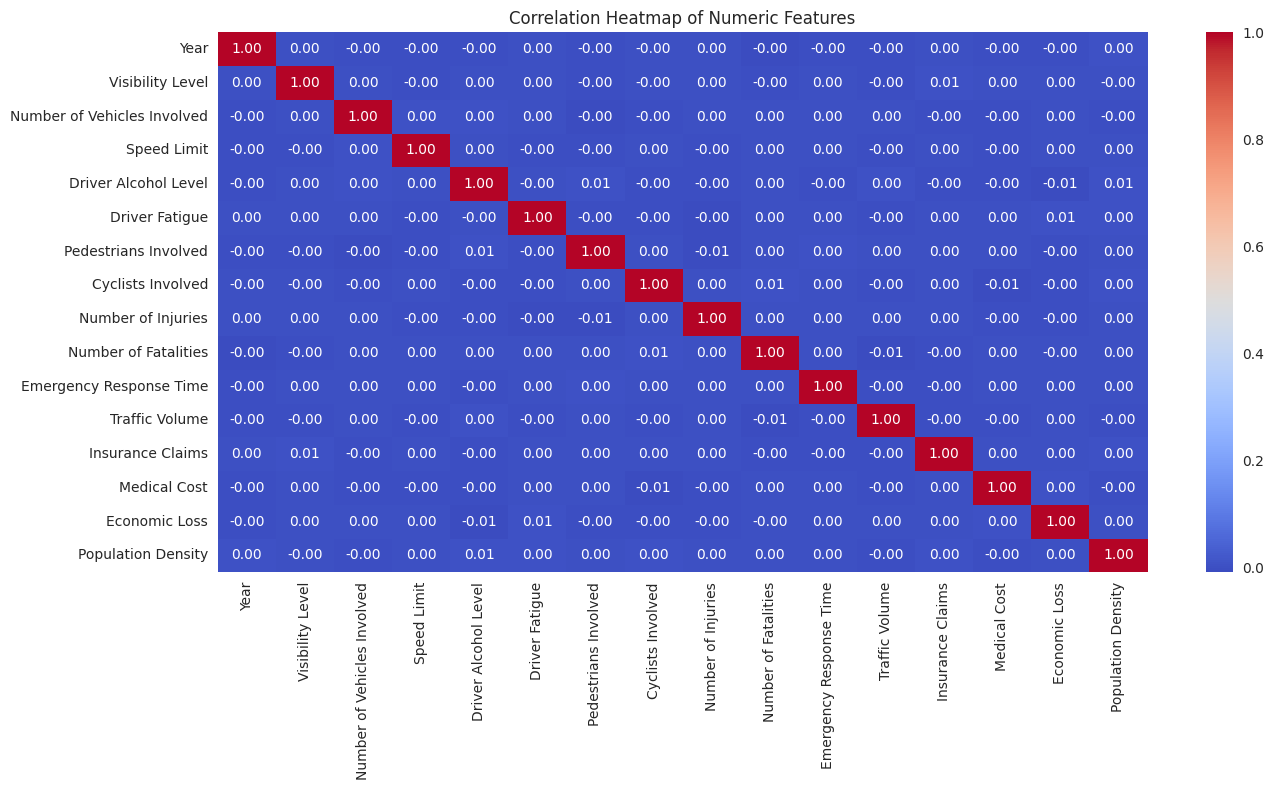

In [85]:
corr = df[num_cols].corr()

plt.figure(figsize=(14,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Prepare dataset for ML by dropping irrelevant columns
df_ml = df.drop(['Date', 'Accident Cause', 'Region', 'Country'], axis=1)

# Encode categorical variables
for col in df_ml.select_dtypes(include='object').columns:
    df_ml[col] = LabelEncoder().fit_transform(df_ml[col])

# Define features and target
X = df_ml.drop('Accident_Severity', axis=1)
y = df_ml['Accident_Severity']

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate performance
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15677
           1       1.00      1.00      1.00      7928
           2       1.00      1.00      1.00     15995

    accuracy                           1.00     39600
   macro avg       1.00      1.00      1.00     39600
weighted avg       1.00      1.00      1.00     39600



In [87]:
# 📌Summary =>

print("\n📌 Summary:")
print("- The dataset contained", df.shape[0], "rows and", df.shape[1], "columns.")
print("- Data cleaning and missing value handling was successfully completed.")
print("- Exploratory Data Analysis (EDA) revealed trends, patterns, and accident risk factors.")

# ✅Conclusion =>

print("\n✅ Conclusion:")
print("- The project aimed to extract meaningful insights from road accident data.")
print("- Analysis identified yearly/monthly trends, accident causes, and region-wise risks.")
print("- A machine learning model was also built to predict accident severity based on available features.")
print("- These findings can help in road safety planning, awareness programs, and policy making.")



📌 Summary:
- The dataset contained 132000 rows and 35 columns.
- Data cleaning and missing value handling was successfully completed.
- Exploratory Data Analysis (EDA) revealed trends, patterns, and accident risk factors.

✅ Conclusion:
- The project aimed to extract meaningful insights from road accident data.
- Analysis identified yearly/monthly trends, accident causes, and region-wise risks.
- A machine learning model was also built to predict accident severity based on available features.
- These findings can help in road safety planning, awareness programs, and policy making.
